**Mohamed Rafiq M**

Task 2 - Color Identification in Images

Installing the necessary package

In [1]:
!pip install extcolors

Importing the necessary libraries

In [2]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import extcolors

Function to convert BGR to RGB

In [3]:
def bgr_rgb(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Fucntion to convert RGB to HEX

In [4]:
def rgb_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Function to get the image and extract colors


In [5]:
def detect_colors(path, number_of_colors):
    image = cv2.imread(path)
    image = bgr_rgb(image)
    plt.title('Image')
    plt.imshow(image)

    image = cv2.resize(image, (600, 600), interpolation=cv2.INTER_AREA)
    image = image.reshape(image.shape[0] * image.shape[1], image.shape[2])
    kmeans = KMeans(n_clusters=number_of_colors)
    label = kmeans.fit_predict(image)
    count = Counter(label)
    center_colors = kmeans.cluster_centers_
    ordered = [center_colors[i] for i in count.keys()]
    hex_colors = [rgb_hex(ordered[i]) for i in count.keys()]

    plt.figure(figsize=(8, 6))
    plt.pie(count.values(), labels=hex_colors, colors=hex_colors)
    plt.title('Colors based on HEX values')
    plt.show()

    colors, pixel_count = extcolors.extract_from_path(path)
    color_list = [[i[0]] for i in colors]
    plt.imshow(color_list)
    plt.title('Colors based on RGB values')  
    plt.show()

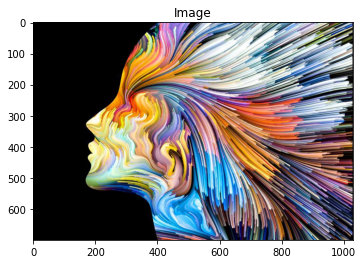

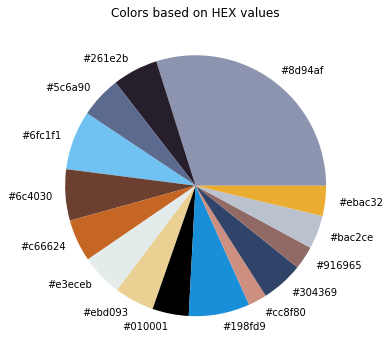

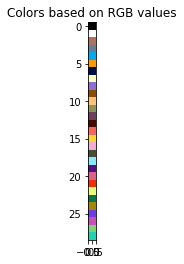

In [6]:
detect_colors('img1.jpg', 15)

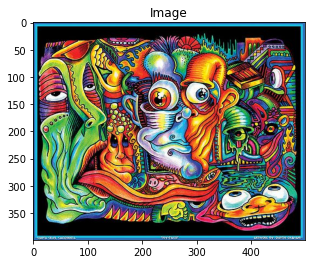

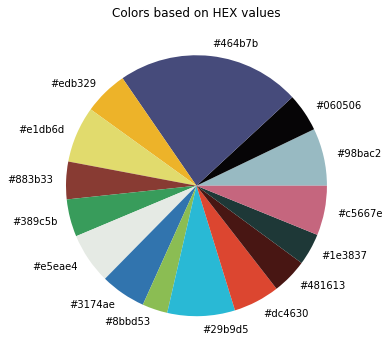

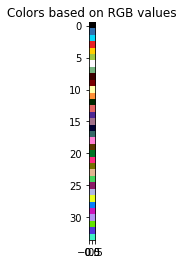

In [7]:
detect_colors('img2.jpg', 15)